In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('parsedSurveyData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   residence                                          344 non-null    object 
 1   program                                            344 non-null    object 
 2   rating                                             344 non-null    float64
 3   residence_Claudette Millar Hall (CMH)              344 non-null    int64  
 4   residence_Columbia Lake Village South (CLV-South)  344 non-null    int64  
 5   residence_Mackenzie King Village (MKV)             344 non-null    int64  
 6   residence_Ron Eydt Village (REV)                   344 non-null    int64  
 7   residence_UW Place (UWP)                           344 non-null    int64  
 8   residence_Village 1                                344 non-null    int64  
 9   extraversi

In [3]:
#personality data
personalityData = data.loc[:, ['extraversion', 'agreeableness', 'conscientiousness', 'emotionalStability', 'Openness']]
personalityData

,extraversion,agreeableness,conscientiousness,emotionalStability,Openness
0,5.5,4.0,6.0,4.0,5.5
1,7.0,4.0,6.0,3.5,5.5
2,4.5,5.0,6.0,6.0,5.0
3,4.0,5.5,3.5,5.5,3.5
4,5.0,5.0,1.5,4.0,6.5
...,...,...,...,...,...
339,6.0,4.5,4.0,4.5,6.5
340,6.0,4.0,2.5,4.5,7.0
341,1.5,4.0,3.5,4.5,5.0
342,7.0,4.5,4.5,4.0,5.5


In [4]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data to mean = 0 and var = 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(personalityData)

/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

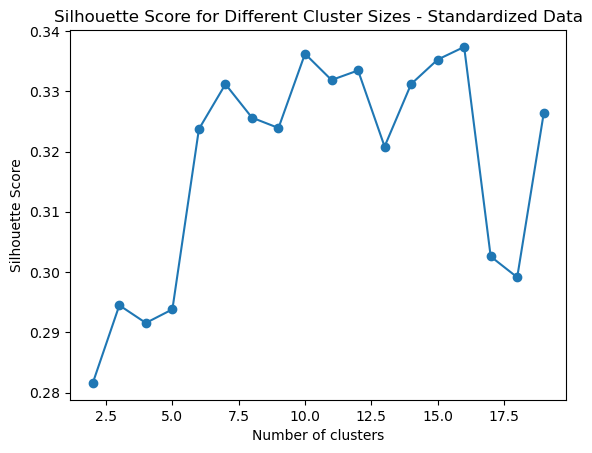

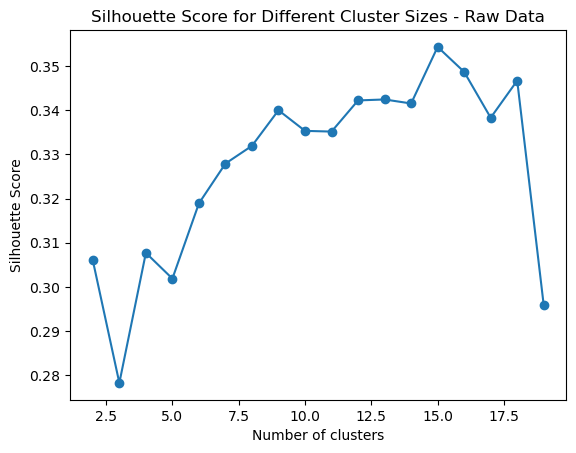

In [5]:
#Lets test which n-number of clusters gives us the best results by testing the silhoutte score and comparing the scores

from sklearn.metrics import silhouette_samples, silhouette_score


silhouette_scores_for_standardized_data = []
silhouette_scores_for_raw_data = []

# Test different cluster sizes
for n_clusters in range(2, 20):
    
    #standardized Data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores_for_standardized_data.append(silhouette_avg)
    
    #raw Data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(personalityData)
    silhouette_avg = silhouette_score(personalityData, cluster_labels)
    silhouette_scores_for_raw_data.append(silhouette_avg)
    

# Plot silhouette scores
plt.plot(range(2, 20), silhouette_scores_for_standardized_data, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes - Standardized Data')
plt.show()

plt.plot(range(2, 20), silhouette_scores_for_raw_data, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes - Raw Data')
plt.show()





In [6]:
#This shows that keeping raw data gives up better results, as well as 10 clusters being the best option

In [7]:
#Now use a 15 cluster K-means cluster model to aggregate the ratings for residencies of grouped people

In [5]:
#create k-means clusters
from sklearn.cluster import KMeans
num_clusters = 15
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(personalityData)
data['cluster'] = kmeans.labels_



/Users/benfogerty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
#get indexes for each respone in personality clusters
cluster_indexes = data.groupby('cluster').apply(lambda x: x.index.tolist())
cluster_indexes

cluster
0                       [9, 51, 59, 61, 71, 78, 90, 96]
1     [4, 49, 56, 86, 150, 153, 154, 156, 157, 158, ...
2     [53, 105, 106, 110, 113, 116, 117, 121, 122, 1...
3     [69, 204, 208, 211, 213, 216, 219, 223, 224, 2...
4     [0, 1, 5, 6, 11, 23, 27, 33, 39, 41, 46, 64, 6...
5     [26, 36, 107, 108, 109, 111, 112, 114, 115, 11...
6     [304, 306, 307, 309, 311, 313, 314, 316, 319, ...
7     [2, 7, 8, 18, 21, 34, 37, 50, 57, 76, 81, 82, ...
8     [15, 25, 88, 89, 159, 162, 165, 170, 175, 180,...
9     [29, 32, 58, 93, 101, 218, 267, 268, 270, 271,...
10    [14, 20, 22, 44, 55, 62, 73, 74, 77, 91, 95, 9...
11    [12, 17, 35, 45, 52, 60, 67, 68, 79, 187, 193,...
12    [3, 16, 31, 38, 47, 80, 92, 94, 98, 102, 160, ...
13    [10, 13, 19, 24, 28, 30, 40, 42, 43, 48, 54, 6...
14    [282, 285, 287, 289, 291, 292, 294, 295, 296, ...
dtype: object

In [7]:
#generate user item matrix, with each index in the cluster_indexes dataframe being a "user" (aggregated from many users), and the array of values being 
#the reisdences the user has reviewed


residence_mapping = {
    'Claudette Millar Hall (CMH)': 1, 
    'Columbia Lake Village South (CLV-South)': 2, 
    'Mackenzie King Village (MKV)': 3,
    'Ron Eydt Village (REV)': 4,
    'UW Place (UWP)': 5,
    'Village 1': 6
}

# Map categorical values to numerical values using the defined mapping
data['residence'] = data['residence'].map(residence_mapping)

data.head()



,residence,program,rating,residence_Claudette Millar Hall (CMH),residence_Columbia Lake Village South (CLV-South),residence_Mackenzie King Village (MKV),residence_Ron Eydt Village (REV),residence_UW Place (UWP),residence_Village 1,extraversion,agreeableness,conscientiousness,emotionalStability,Openness,cluster
0,5,Engineering,7.0,0,0,0,0,1,0,5.5,4.0,6.0,4.0,5.5,4
1,4,Engineering,10.0,0,0,0,1,0,0,7.0,4.0,6.0,3.5,5.5,4
2,4,Engineering,10.0,0,0,0,1,0,0,4.5,5.0,6.0,6.0,5.0,7
3,4,Engineering,6.0,0,0,0,1,0,0,4.0,5.5,3.5,5.5,3.5,12
4,6,Engineering,6.0,0,0,0,0,0,1,5.0,5.0,1.5,4.0,6.5,1


In [53]:
ratings_dict = {
    "residence": [],
    "user": [],
    "rating": []
}


for user_index in range(0,len(cluster_indexes)):
    for item_index in cluster_indexes[user_index]:
        ratings_dict["user"].append(user_index)
        ratings_dict["residence"].append(data.loc[item_index, 'residence'])
        ratings_dict["rating"].append(data.loc[item_index, 'rating'])
    

# Step 2: Create user-item matrix
user_residence_data = pd.DataFrame.from_dict(ratings_dict)

user_item_matrix = user_residence_data.pivot_table(index='residence', columns='user', values='rating', fill_value=0)
# Step 3: Train collaborative filtering model
print(pd.DataFrame(user_item_matrix))



user             0          1         2   3         4      5     6     7   \
residence                                                                   
1          3.000000  10.000000  0.000000   2  8.500000  4.625  3.00   8.0   
2          0.000000   0.000000  0.000000   0  7.000000  0.000  0.00   0.0   
3          0.000000   5.500000  0.000000   8  3.000000  7.000  0.00   7.5   
4          5.000000   5.021739  8.100000   0  6.800000  0.000  0.00   8.0   
5          6.666667   0.000000  1.000000   0  7.250000  8.000  2.35   7.0   
6          6.333333   6.000000  8.105263   0  5.833333  3.050  0.00  10.0   

user             8         9         10        11    12        13        14  
residence                                                                    
1          8.793103  0.000000  9.000000  0.000000  8.00  8.000000  0.000000  
2          0.000000  0.000000  0.000000  0.000000  0.00  0.000000  0.000000  
3          9.000000  7.000000  7.333333  9.315789  9.00  7.000000  2.22

In [97]:
from sklearn.neighbors import NearestNeighbors

df = pd.DataFrame(user_item_matrix)

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=3)
print(indices)


[[0 2 3]
 [1 0 3]
 [2 4 0]
 [3 5 4]
 [4 2 5]
 [5 3 4]]


In [9]:
#Now get rating and residence for each user per cluster, and then create an array representing average rating for each response per cluster

In [12]:
results = [0] * num_clusters

for k in range(num_clusters):
    ans = {
        'residence_Claudette Millar Hall (CMH)': [0,0],
        'residence_Columbia Lake Village South (CLV-South)': [0,0],
        'residence_UW Place (UWP)': [0,0],
        'residence_Ron Eydt Village (REV)': [0,0],
        'residence_Mackenzie King Village (MKV)': [0,0],
        'residence_Village 1': [0,0]
    }
    
    for i in cluster_indexes[k]:
        for column in data.columns[2:8]:
            if data.loc[i, column] == 1:
                ans[column][0] += 1
                ans[column][1] += data.loc[i, 'rating']
    
    
    
    for key, value in ans.items():
        if ans[key][0] != 0:
            ans[key] = value[1] / value[0]
        else:
            ans[key] = 0

    values_list = list(ans.values())
    array = np.array(values_list)
    results[k] = array

data_array = np.array(results)
print(data_array)
            

KeyError: 'rating'

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(results)

In [ ]:
user_id = 0
user_ratings = data_array[user_id].reshape(1, -1)  # Reshape to 2D array for sklearn

# Find k nearest neighbors
k = 1
distances, indices = knn_model.kneighbors(user_ratings, n_neighbors=k+1)  # +1 to exclude the user itself

# Get recommendations based on nearest neighbors
recommended_items = indices.flatten()[1:]  # Exclude the user itself
print("Recommended items for user", user_id, ":", recommended_items)